notebook 7 
NBEATS
- wybór okna czasowego
- podzbiory kolumn
- optuna na strukturze
- sprawdzenie funkcji do metryk

In [1]:
pip install neuralforecast

INFO: pip is looking at multiple versions of neuralforecast to determine which version is compatible with other requirements. This could take a while.
     ---------------------------------------- 0.0/141.8 kB ? eta -:--:--
     ---------- -------------------------- 41.0/141.8 kB 991.0 kB/s eta 0:00:01
     ------------------------- ------------- 92.2/141.8 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 141.8/141.8 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     ---------------- ----------------------- 41.0/96.5 kB 1.9 MB/s eta 0:00:01
     ---------------------------------------- 96.5/96.5 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/91.2 kB ? eta -:--:--
     ----------------- -------------------- 41.0/91.2 kB 991.0 kB/s eta 0:00:01
     ---------------------------------------- 91.2/91.2 kB 1.3 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of neuralforecast to det

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [8 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\HP\AppData\Local\Temp\pip-install-0x6mvtf8\numba_97f8cf0429ea4203a9f1bd52484ec2ca\setup.py", line 51, in <module>
          _guard_py_ver()
        File "C:\Users\HP\AppData\Local\Temp\pip-install-0x6mvtf8\numba_97f8cf0429ea4203a9f1bd52484ec2ca\setup.py", line 48, in _guard_py_ver
          raise RuntimeError(msg.format(cur_py, min_py, max_py))
      RuntimeError: Cannot install on Python version 3.12.0; only versions >=3.8,<3.12 are supported.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS
from neuralforecast.utils import AirPassengersDF

# Split data and declare panel dataset
Y_df = AirPassengersDF
Y_train_df = Y_df[Y_df.ds<='1959-12-31'] # 132 train
Y_test_df = Y_df[Y_df.ds>'1959-12-31'] # 12 test

# Fit and predict with NBEATS and NHITS models
horizon = len(Y_test_df)
models = [NBEATS(input_size=2 * horizon, h=horizon, max_steps=50),
          NHITS(input_size=2 * horizon, h=horizon, max_steps=50)]
nf = NeuralForecast(models=models, freq='M')
nf.fit(df=Y_train_df)
Y_hat_df = nf.predict().reset_index()

# Plot predictions
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
Y_hat_df = Y_test_df.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])
plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index('ds')

plot_df[['y', 'NBEATS', 'NHITS']].plot(ax=ax, linewidth=2)

ax.set_title('AirPassengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [4]:
import pandas as pd
import numpy as np
from scripts.essentials import *
from scripts.plots import *
from scripts.train_utilities import *

In [1]:
import pandas as pd

prefix = "NFLX"

df_with_weekends = pd.read_csv("csv/"+prefix+'_with_weekends.csv')
df_without_weekends = pd.read_csv("csv/"+prefix+'_without_weekends.csv')

In [45]:
df_with_weekends.drop(columns=['NFLX_Open', 'NFLX_High', 'NFLX_Low', 'NFLX_Close', 'Unnamed: 0', '^GSPC_Close','vwap_14'], inplace=True) 

In [46]:
df_with_weekends['target_1'] = df_with_weekends['log_return_1'].shift(-1)
df_with_weekends['target_5'] = df_with_weekends['log_return_5'].shift(-5)
df_with_weekends['target_10'] = df_with_weekends['log_return_10'].shift(-10)
df_with_weekends['target_20'] = df_with_weekends['log_return_20'].shift(-20)

In [134]:
train_set, val_set, test_set = split_data(df_without_weekends, 'Date', '2023-01-01', '2023-03-01', start_date_train = '2021-01-01')
print(train_set.shape)
print(val_set.shape)
print(test_set.shape)

(730, 50)
(59, 50)
(55, 50)


In [11]:
train_set.columns

Index(['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader', 'Date', '^GSPC_Volume',
       'EURUSD=X_Close', 'NFLX_Volume', 'mean_future', 'mean_influential',
       'mean_trustworthy', 'mean_clickbait', 'norm_rsi_14', 'norm_rsi_gspc_14',
       'norm_slowk_14', 'norm_roc_14', 'log_return_1', 'log_return_5',
       'log_return_10', 'log_return_20', 'log_return_gspc_1',
       'log_return_gspc_5', 'log_return_gspc_10', 'log_return_gspc_20',
       'daily_variation', 'high_close_pressure', 'low_open_pressure',
       'low_norm', 'close_norm', 'high_norm', 'open_norm', 'target_1',
       'target_5', 'target_10', 'target_20'],
      dtype='object')

In [135]:
train_set = train_set[['Date', 'log_return_1','mean_future', 'mean_influential','mean_trustworthy', 'mean_clickbait', 'log_return_gspc_1', 'norm_rsi_14', 'norm_slowk_14', 'norm_roc_14', 'target_1']]
val_set = val_set[['Date','log_return_1','mean_future', 'mean_influential','mean_trustworthy', 'mean_clickbait', 'log_return_gspc_1', 'norm_rsi_14', 'norm_slowk_14', 'norm_roc_14', 'target_1']]
test_set = test_set[['Date','log_return_1','mean_future', 'mean_influential','mean_trustworthy', 'mean_clickbait', 'log_return_gspc_1', 'norm_rsi_14', 'norm_slowk_14', 'norm_roc_14', 'target_1']]
train_set.rename(columns={'Date':'ds', 'target_1':'y'}, inplace=True)
val_set.rename(columns={'Date':'ds', 'target_1':'y'}, inplace=True)
test_set.rename(columns={'Date':'ds', 'target_1':'y'}, inplace=True)
train_set['unique_id'] = 'NFLX'
val_set['unique_id'] = 'NFLX'
test_set['unique_id'] = 'NFLX'

In [136]:
val_set.tail()

,ds,log_return_1,mean_future,mean_influential,mean_trustworthy,mean_clickbait,log_return_gspc_1,norm_rsi_14,norm_slowk_14,norm_roc_14,y,unique_id
784,2023-02-24,0.000000,0.074717,0.304888,0.275707,0.082836,0.000000,0.577912,0.881310,0.038187,0.019808,NFLX
785,2023-02-25,0.019808,0.086859,0.232262,0.222720,0.049219,-0.004203,0.617332,0.913743,0.079986,-0.006529,NFLX
786,2023-02-26,-0.006529,0.138287,0.405005,0.384895,0.126674,-0.006996,0.597395,0.860940,0.106104,-0.005895,NFLX
787,2023-02-27,-0.005895,0.057587,0.125473,0.104018,0.036830,-0.003216,0.579317,0.808897,0.095444,-0.000768,NFLX
788,2023-02-28,-0.000768,0.056839,0.190404,0.187410,0.041343,0.001426,0.576877,0.774746,0.084523,0.005765,NFLX


In [40]:
# if there is not row with a date then copy row from previous day with this date  
train_set = train_set.set_index('ds').resample('D').ffill().reset_index()
val_set = val_set.set_index('ds').resample('D').ffill().reset_index()
test_set = test_set.set_index('ds').resample('D').ffill().reset_index()


In [137]:
# make ds as timestamp
train_set['ds'] = pd.to_datetime(train_set['ds'])
val_set['ds'] = pd.to_datetime(val_set['ds'])
test_set['ds'] = pd.to_datetime(test_set['ds'])

In [79]:
study.best_params

{'input_size': 6,
 'n_blocks_season': 2,
 'n_blocks_trend': 3,
 'n_blocks_ident': 2,
 'mlp_units': 64,
 'num_hidden': 3,
 'n_harmonics': 2,
 'n_polynomials': 4,
 'scaler_type': 'standard',
 'learning_rate': 0.0009164455243785934}

In [234]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS 
from neuralforecast.losses.pytorch import DistributionLoss, MQLoss
h = val_set['ds'].nunique()
# models = [NBEATS(h=h,input_size=2,
#                  loss=DistributionLoss(distribution='Normal', level=[90]),
#                  max_steps=100,
#                  scaler_type='standard',
#                 futr_exog_list=['mean_future', 'mean_influential','mean_trustworthy', 'mean_clickbait', 'log_return_gspc_1', 'norm_rsi_14', 'norm_slowk_14', 'norm_roc_14'])]
n_blocks = [prms['n_blocks_season'], prms['n_blocks_trend'], prms['n_blocks_ident']]
mlp_units=[[prms['mlp_units'], prms['mlp_units']]*prms['num_hidden']]
models = [NBEATS(
                 h=h,
                 loss=DistributionLoss(distribution='Normal', level=[90]),
                 max_steps=1000,
                 futr_exog_list=['log_return_1','mean_future', 'mean_influential','mean_trustworthy', 'mean_clickbait', 'log_return_gspc_1', 'norm_rsi_14', 'norm_slowk_14', 'norm_roc_14'],
                 input_size=prms['input_size'],
                 stack_types=['seasonality', 'trend', 'identity'],
                 mlp_units=mlp_units,
                 n_blocks=n_blocks,
                 learning_rate=prms['learning_rate'],
                 n_harmonics=prms['n_harmonics'],
                 n_polynomials=prms['n_polynomials'],
                 scaler_type='standard',
                random_seed=1
                 )]
model = NeuralForecast(models=models, freq='D')
model.fit(train_set)

p =  model.predict(futr_df=val_set).reset_index()
#p = p.merge(val_set[['ds','unique_id', 'y']], on=['ds', 'unique_id'], how='left')
# p = p.merge(val_set[['Date', 'target_1']], on=['Date'], how='left')
p = p.merge(val_set[['ds','unique_id', 'y']].reset_index(), on=['ds', 'unique_id'], how='left')
loss = count_signs_matrix(p['y'], p['NBEATS']) 
loss = loss[1][1]/(loss[1][0]+loss[1][1])
loss

Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 46.47it/s]


1.0

In [233]:
prms = study.best_trial.params

In [150]:
mean_squared_error(p['y'], p['NBEATS'])

0.0005643292272526135

In [176]:
h

59

In [214]:
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    input_size = trial.suggest_int('input_size', 1, 15)
    
    n_blocks_season = trial.suggest_int('n_blocks_season', 1, 3)
    n_blocks_trend = trial.suggest_int('n_blocks_trend', 1, 3)
    n_blocks_identity = trial.suggest_int('n_blocks_ident', 1, 3)
    
    mlp_units_n = trial.suggest_categorical('mlp_units', [32, 64, 128])
    num_hidden = trial.suggest_int('num_hidden', 1, 3)
    
    n_harmonics = trial.suggest_int('n_harmonics', 1, 5)
    n_polynomials = trial.suggest_int('n_polynomials', 1, 5)
    
    scaler_type = trial.suggest_categorical('scaler_type', ['standard'])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    
    
    n_blocks = [n_blocks_season, n_blocks_trend, n_blocks_identity]
    mlp_units=[[mlp_units_n, mlp_units_n]]*num_hidden
    h = val_set['ds'].nunique()
    models = [NBEATS(h=h,input_size=input_size,
                 loss=DistributionLoss(distribution='Normal', level=[90]),
                 max_steps=1000,
                 futr_exog_list=['log_return_1','mean_future', 'mean_influential','mean_trustworthy', 'mean_clickbait', 'log_return_gspc_1', 'norm_rsi_14', 'norm_slowk_14', 'norm_roc_14'],
                 stack_types=['seasonality', 'trend', 'identity'],
                 mlp_units=mlp_units,
                 n_blocks=n_blocks,
                 learning_rate=learning_rate,
                 n_harmonics=n_harmonics,
                 n_polynomials=n_polynomials,
                 scaler_type=scaler_type)
                 ]
    model = NeuralForecast(models=models, freq='D')
    model.fit(train_set)
    p = model.predict(futr_df=val_set).reset_index()
    p = p.merge(val_set[['ds', 'unique_id', 'y']], on=['ds', 'unique_id'], how='left')
    loss = count_signs_matrix(p['y'], p['NBEATS']) 
    loss = (2*loss[1][1]/(loss[1][0]+loss[1][1]) + loss[1][1]/(loss[0][1]+loss[1][1]))/3

    return loss

In [215]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-12-15 19:53:45,776] A new study created in memory with name: no-name-c2f6ac2f-b237-417b-bdd2-228e57d3db9c
Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 44.70it/s]

[I 2023-12-15 19:55:37,754] Trial 0 finished with value: 0.23076923076923078 and parameters: {'input_size': 1, 'n_blocks_season': 3, 'n_blocks_trend': 2, 'n_blocks_ident': 2, 'mlp_units': 128, 'num_hidden': 3, 'n_harmonics': 2, 'n_polynomials': 3, 'scaler_type': 'standard', 'learning_rate': 0.0018224348752240212}. Best is trial 0 with value: 0.23076923076923078.


Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 37.36it/s]


[I 2023-12-15 19:57:04,337] Trial 1 finished with value: 0.5 and parameters: {'input_size': 2, 'n_blocks_season': 3, 'n_blocks_trend': 3, 'n_blocks_ident': 3, 'mlp_units': 128, 'num_hidden': 1, 'n_harmonics': 1, 'n_polynomials': 1, 'scaler_type': 'standard', 'learning_rate': 9.100866201018801e-05}. Best is trial 1 with value: 0.5.
Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 80.98it/s]


[I 2023-12-15 19:58:34,457] Trial 2 finished with value: 0.038461538461538464 and parameters: {'input_size': 5, 'n_blocks_season': 2, 'n_blocks_trend': 3, 'n_blocks_ident': 1, 'mlp_units': 128, 'num_hidden': 2, 'n_harmonics': 1, 'n_polynomials': 3, 'scaler_type': 'standard', 'learning_rate': 0.00037754651485030695}. Best is trial 1 with value: 0.5.
Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 57.15it/s]


[I 2023-12-15 20:00:07,320] Trial 3 finished with value: 0.6538461538461539 and parameters: {'input_size': 4, 'n_blocks_season': 2, 'n_blocks_trend': 1, 'n_blocks_ident': 3, 'mlp_units': 64, 'num_hidden': 3, 'n_harmonics': 2, 'n_polynomials': 4, 'scaler_type': 'standard', 'learning_rate': 6.347568649856103e-05}. Best is trial 3 with value: 0.6538461538461539.
Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 45.90it/s]

[I 2023-12-15 20:02:08,372] Trial 4 finished with value: 0.5 and parameters: {'input_size': 2, 'n_blocks_season': 3, 'n_blocks_trend': 2, 'n_blocks_ident': 3, 'mlp_units': 128, 'num_hidden': 1, 'n_harmonics': 3, 'n_polynomials': 1, 'scaler_type': 'standard', 'learning_rate': 0.015457594723471803}. Best is trial 3 with value: 0.6538461538461539.
Seed set to 1



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 35.22it/s]

[I 2023-12-15 20:03:36,134] Trial 5 finished with value: 0.5 and parameters: {'input_size': 3, 'n_blocks_season': 3, 'n_blocks_trend': 1, 'n_blocks_ident': 1, 'mlp_units': 128, 'num_hidden': 1, 'n_harmonics': 1, 'n_polynomials': 3, 'scaler_type': 'standard', 'learning_rate': 0.016752815803282823}. Best is trial 3 with value: 0.6538461538461539.
Seed set to 1



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 38.35it/s]

[I 2023-12-15 20:05:05,523] Trial 6 finished with value: 0.07692307692307693 and parameters: {'input_size': 5, 'n_blocks_season': 1, 'n_blocks_trend': 3, 'n_blocks_ident': 3, 'mlp_units': 32, 'num_hidden': 3, 'n_harmonics': 3, 'n_polynomials': 3, 'scaler_type': 'standard', 'learning_rate': 4.075053763785384e-05}. Best is trial 3 with value: 0.6538461538461539.


Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 35.48it/s]


[I 2023-12-15 20:06:45,030] Trial 7 finished with value: 1.0 and parameters: {'input_size': 1, 'n_blocks_season': 2, 'n_blocks_trend': 2, 'n_blocks_ident': 2, 'mlp_units': 128, 'num_hidden': 1, 'n_harmonics': 3, 'n_polynomials': 2, 'scaler_type': 'standard', 'learning_rate': 0.0027906075985262703}. Best is trial 7 with value: 1.0.
Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 50.45it/s]

[I 2023-12-15 20:08:17,806] Trial 8 finished with value: 0.23076923076923078 and parameters: {'input_size': 2, 'n_blocks_season': 3, 'n_blocks_trend': 2, 'n_blocks_ident': 1, 'mlp_units': 128, 'num_hidden': 1, 'n_harmonics': 2, 'n_polynomials': 3, 'scaler_type': 'standard', 'learning_rate': 1.4021518125086367e-05}. Best is trial 7 with value: 1.0.


Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 51.98it/s]_step=0.104, train_loss_epoch=0.104]              


[I 2023-12-15 20:08:45,778] Trial 9 finished with value: 0.34615384615384615 and parameters: {'input_size': 2, 'n_blocks_season': 2, 'n_blocks_trend': 2, 'n_blocks_ident': 1, 'mlp_units': 64, 'num_hidden': 2, 'n_harmonics': 3, 'n_polynomials': 3, 'scaler_type': 'standard', 'learning_rate': 0.0004919778755160735}. Best is trial 7 with value: 1.0.
Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 54.52it/s]_step=4.600, train_loss_epoch=4.600]           

[I 2023-12-15 20:09:09,446] Trial 10 finished with value: 1.0 and parameters: {'input_size': 6, 'n_blocks_season': 1, 'n_blocks_trend': 1, 'n_blocks_ident': 2, 'mlp_units': 32, 'num_hidden': 2, 'n_harmonics': 5, 'n_polynomials': 5, 'scaler_type': 'standard', 'learning_rate': 0.06614876804105344}. Best is trial 7 with value: 1.0.
Seed set to 1



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 45.71it/s]_step=4.590, train_loss_epoch=4.590]            

[I 2023-12-15 20:10:09,108] Trial 11 finished with value: 0.6153846153846154 and parameters: {'input_size': 6, 'n_blocks_season': 1, 'n_blocks_trend': 1, 'n_blocks_ident': 2, 'mlp_units': 32, 'num_hidden': 2, 'n_harmonics': 5, 'n_polynomials': 5, 'scaler_type': 'standard', 'learning_rate': 0.08760874571494572}. Best is trial 7 with value: 1.0.
Seed set to 1



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 23.25it/s]_step=-2.22, train_loss_epoch=-2.22]        

[I 2023-12-15 20:10:58,023] Trial 12 finished with value: 0.2692307692307692 and parameters: {'input_size': 6, 'n_blocks_season': 1, 'n_blocks_trend': 1, 'n_blocks_ident': 2, 'mlp_units': 32, 'num_hidden': 2, 'n_harmonics': 5, 'n_polynomials': 5, 'scaler_type': 'standard', 'learning_rate': 0.004412107092660275}. Best is trial 7 with value: 1.0.


Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 34.99it/s]_step=7.35e+3, train_loss_epoch=7.35e+3]        

[I 2023-12-15 20:11:13,459] Trial 13 finished with value: 0.5384615384615384 and parameters: {'input_size': 4, 'n_blocks_season': 1, 'n_blocks_trend': 1, 'n_blocks_ident': 2, 'mlp_units': 32, 'num_hidden': 1, 'n_harmonics': 4, 'n_polynomials': 2, 'scaler_type': 'standard', 'learning_rate': 0.05891590234938065}. Best is trial 7 with value: 1.0.
Seed set to 1



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 36.46it/s]_step=-.657, train_loss_epoch=-.657]         

[I 2023-12-15 20:11:28,496] Trial 14 finished with value: 0.6923076923076923 and parameters: {'input_size': 1, 'n_blocks_season': 2, 'n_blocks_trend': 2, 'n_blocks_ident': 2, 'mlp_units': 32, 'num_hidden': 2, 'n_harmonics': 4, 'n_polynomials': 2, 'scaler_type': 'standard', 'learning_rate': 0.006252015298012767}. Best is trial 7 with value: 1.0.


In [ ]:
prms = study.best_trial.params

In [ ]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS 
from neuralforecast.losses.pytorch import DistributionLoss, MQLoss
h = val_set['ds'].nunique()
n_blocks = [prms['n_blocks_season'], prms['n_blocks_trend'], prms['n_blocks_ident']]
mlp_units=[[prms['mlp_units'], prms['mlp_units']]*prms['num_hidden']]
models = [NBEATS(
                 h=h,
                 loss=DistributionLoss(distribution='Normal', level=[90]),
                 max_steps=1000,
                 futr_exog_list=['log_return_1','mean_future', 'mean_influential','mean_trustworthy', 'mean_clickbait', 'log_return_gspc_1', 'norm_rsi_14', 'norm_slowk_14', 'norm_roc_14'],
                 input_size=prms['input_size'],
                 stack_types=['seasonality', 'trend', 'identity'],
                 mlp_units=mlp_units,
                 n_blocks=n_blocks,
                 learning_rate=prms['learning_rate'],
                 n_harmonics=prms['n_harmonics'],
                 n_polynomials=prms['n_polynomials'],
                 scaler_type='standard',
                random_seed=1
                 )]
model = NeuralForecast(models=models, freq='D')
model.fit(train_set)

p =  model.predict(futr_df=val_set).reset_index()
p = p.merge(val_set[['ds','unique_id', 'y']].reset_index(), on=['ds', 'unique_id'], how='left')
loss = count_signs_matrix(p['y'], p['NBEATS']) 
loss = (2*loss[1][1]/(loss[1][0]+loss[1][1]) + loss[1][1]/(loss[0][1]+loss[1][1]))/3
loss

In [243]:
model.__dict__

{'h': 59,
 'models_init': [NBEATS],
 'models': [NBEATS],
 'freq': <Day>,
 'local_scaler_type': None,
 '_fitted': True,
 'dataset': TimeSeriesDataset(n_data=730, n_groups=1),
 'uids': Index(['NFLX'], dtype='object', name='unique_id'),
 'last_dates': DatetimeIndex(['2022-12-31'], dtype='datetime64[ns]', name='ds', freq=None),
 'ds': MultiIndex([('NFLX', '2021-01-01'),
             ('NFLX', '2021-01-02'),
             ('NFLX', '2021-01-03'),
             ('NFLX', '2021-01-04'),
             ('NFLX', '2021-01-05'),
             ('NFLX', '2021-01-06'),
             ('NFLX', '2021-01-07'),
             ('NFLX', '2021-01-08'),
             ('NFLX', '2021-01-09'),
             ('NFLX', '2021-01-10'),
             ...
             ('NFLX', '2022-12-22'),
             ('NFLX', '2022-12-23'),
             ('NFLX', '2022-12-24'),
             ('NFLX', '2022-12-25'),
             ('NFLX', '2022-12-26'),
             ('NFLX', '2022-12-27'),
             ('NFLX', '2022-12-28'),
             ('NFLX', 

In [ ]:
loss_b1 = count_signs_matrix(p['y'][:-1],p['y'].shift(-1)[:(len(p['y'])-1)])
loss_b1 = (2*loss_b1[1][1]/(loss_b1[1][0]+loss_b1[1][1]) + loss_b1[1][1]/(loss_b1[0][1]+loss_b1[1][1]))/3
loss_b2 = count_signs_matrix(p['y'], [0 for i in range(len(val_set))])
loss_b2 = (2*loss_b2[1][1]/(loss_b2[1][0]+loss_b2[1][1]) + loss_b2[1][1]/(loss_b2[0][1]+loss_b2[1][1]))/3

print(f"loss baseline 1: {loss_b1}")
print(f"loss baseline 2: {loss_b2}")

if loss > loss_b1 and loss > loss_b2:
    print("Model is better than both baselines")


In [229]:
prms = study.get_trials()[10].params

In [57]:
val_set.head()

,ds,mean_future,mean_influential,mean_trustworthy,mean_clickbait,log_return_gspc_1,norm_rsi_14,norm_slowk_14,norm_roc_14,y,unique_id
1033,2023-07-01,0.121962,0.479170,0.464013,0.227652,0.00000,0.678372,0.805054,0.019747,0.000000,NFLX
1034,2023-07-02,0.191431,0.457522,0.426086,0.187946,0.00000,0.678372,0.805054,0.019747,0.002154,NFLX
1035,2023-07-03,0.197864,0.503323,0.430169,0.164357,0.00117,0.683970,0.917842,0.021947,0.000000,NFLX
1036,2023-07-04,-0.056240,-0.066822,-0.006749,-0.026588,0.00000,0.683970,0.917842,0.015505,0.010053,NFLX
1037,2023-07-05,0.112205,0.263429,0.224886,0.101679,-0.00197,0.711326,0.871548,0.050536,-0.015960,NFLX


In [165]:
test_set['ds']

789   2023-03-01
790   2023-03-02
791   2023-03-03
792   2023-03-04
793   2023-03-05
794   2023-03-06
795   2023-03-07
796   2023-03-08
797   2023-03-09
798   2023-03-10
799   2023-03-11
800   2023-03-12
801   2023-03-13
802   2023-03-14
803   2023-03-15
804   2023-03-16
805   2023-03-17
806   2023-03-18
807   2023-03-19
808   2023-03-20
809   2023-03-21
810   2023-03-22
811   2023-03-23
812   2023-03-24
813   2023-03-25
814   2023-03-26
815   2023-03-27
816   2023-03-28
817   2023-03-29
818   2023-03-30
819   2023-03-31
820   2023-04-01
821   2023-04-02
822   2023-04-03
823   2023-04-04
824   2023-04-05
825   2023-04-06
826   2023-04-07
827   2023-04-08
828   2023-04-09
829   2023-04-10
830   2023-04-11
831   2023-04-12
832   2023-04-13
833   2023-04-14
834   2023-04-15
835   2023-04-16
836   2023-04-17
837   2023-04-18
838   2023-04-19
839   2023-04-20
840   2023-04-21
841   2023-04-22
842   2023-04-23
843   2023-04-24
Name: ds, dtype: datetime64[ns]

In [187]:
model.predict(futr_df=val_set).reset_index()

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 180.12it/s]


,unique_id,ds,NBEATS
0,NFLX,2023-01-01,-0.006884
1,NFLX,2023-01-02,-0.010781


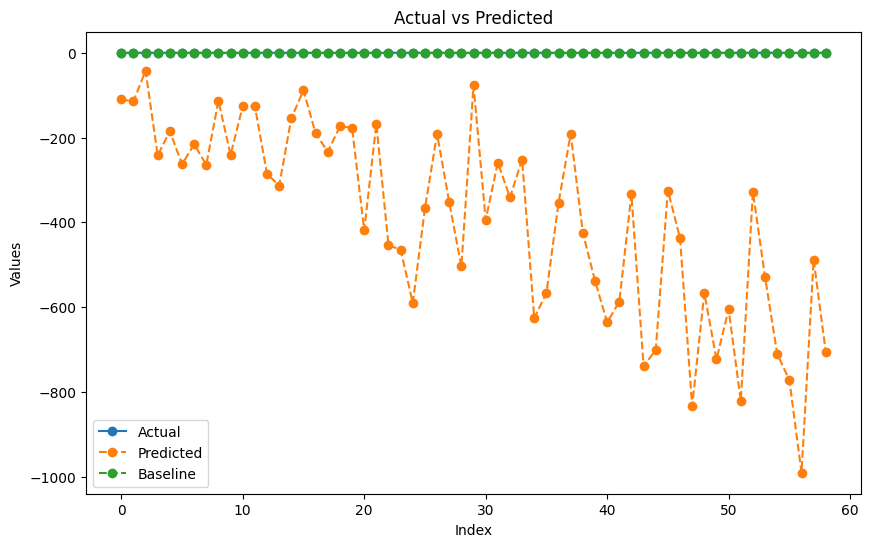

In [235]:
plot_actual_vs_predicted(p['y'], p['NBEATS'], [0 for i in range(len(val_set))])

In [213]:
count_signs_matrix(p['y'], p['NBEATS'])

array([[15, 16],
       [ 9, 17]])

In [202]:
count_signs_matrix(p['y'][:-1],p['y'].shift(-1)[:(len(p['y'])-1)])


array([[14, 14],
       [15, 11]])

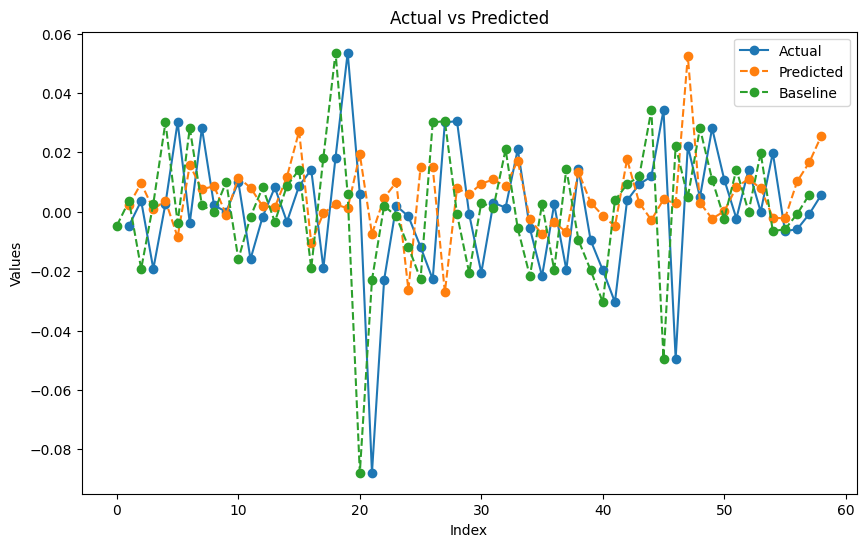

In [153]:
plot_actual_vs_predicted(p['y'][1:], p['NBEATS'][1:], p['y'].shift(-1))

In [125]:
df_without_weekends = pd.read_csv("csv/"+prefix+'_without_weekends.csv')

In [127]:
df_without_weekends.drop(columns=['NFLX_Open', 'NFLX_High', 'NFLX_Low', 'NFLX_Close', 'Unnamed: 0', '^GSPC_Close','vwap_14'], inplace=True) 

In [128]:
df_without_weekends['target_1'] = df_without_weekends['log_return_1'].shift(-1)
df_without_weekends['target_5'] = df_without_weekends['log_return_5'].shift(-5)
df_without_weekends['target_10'] = df_without_weekends['log_return_10'].shift(-10)
df_without_weekends['target_20'] = df_without_weekends['log_return_20'].shift(-20)

In [131]:
# Add column date_generated with dates from 2021-01-01 incremented by 1 day
df_without_weekends['Date'] = pd.date_range(start='2021-01-01', end='2023-09-01', freq='D')[:len(df_without_weekends)]

In [1]:
from model_training import *
import pandas as pd
import numpy as np
from scripts.essentials import *
from scripts.plots import *
from scripts.train_utilities import *

c:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] Nie można odnaleźć określonej procedury
  warn(f"Failed to load image Python extension: {e}")


In [2]:
FINAL_COLS

['mean_future',
 'mean_influential',
 'mean_trustworthy',
 'mean_clickbait',
 'NFLX_High',
 'NFLX_Low',
 'NFLX_Open']

In [2]:
prefix = "NFLX"

df_without_weekends = pd.read_csv("csv/"+prefix+'_without_weekends.csv')
#df_without_weekends.drop(columns=['Unnamed: 0'], inplace=True) 
df_without_weekends['DateGen'] = pd.date_range(start='2021-01-01', end='2023-11-26', freq='D')[:len(df_without_weekends)]
# Take the max date from the dataset
max_date = df_without_weekends['DateGen'].max()
# Deduct 40 days from this date
test_start_date = max_date - pd.DateOffset(days=59)
# Deduct 60 days from the test_start_date
val_start_date = test_start_date - pd.DateOffset(days=40)
train_set, val_set, test_set = split_data(df_without_weekends, 'DateGen', val_start_date, test_start_date, start_date_train = '2021-01-01')
print(train_set.shape)
print(val_set.shape)
print(test_set.shape)


(744, 54)
(40, 54)
(60, 54)


In [3]:
cols_min_max = ['^GSPC_Volume', 'NFLX_Volume',
'daily_variation', 'high_close_pressure', 'low_open_pressure',
'low_norm', 'close_norm', 'high_norm', 'open_norm']

train_set, scaler_min_max = min_max_scale(train_set,'Date', cols_min_max, train_data=True, scaler=None)
val_set = min_max_scale(val_set,'Date', cols_min_max, train_data=False, scaler=scaler_min_max)
test_set = min_max_scale(test_set,'Date', cols_min_max, train_data=False, scaler=scaler_min_max)

In [4]:
train_set['DateGen'].max(), val_set['DateGen'].min(),val_set['DateGen'].max(), test_set['DateGen'].min(),test_set['DateGen'].max()

(Timestamp('2023-01-14 00:00:00'),
 Timestamp('2023-01-15 00:00:00'),
 Timestamp('2023-02-23 00:00:00'),
 Timestamp('2023-02-24 00:00:00'),
 Timestamp('2023-04-24 00:00:00'))

In [5]:
train_set.columns

Index(['Unnamed: 0', 'future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader', 'Date', '^GSPC_Close',
       'EURUSD=X_Close', 'NFLX_Open', 'NFLX_High', 'NFLX_Low', 'NFLX_Close',
       'mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait',
       'norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14', 'vwap_14',
       'norm_roc_14', 'log_return_1', 'log_return_5', 'log_return_10',
       'log_return_20', 'log_return_gspc_1', 'log_return_gspc_5',
       'log_return_gspc_10', 'log_return_gspc_20', 'DateGen',
       'minmax_^GSPC_Volume', 'minmax_NFLX_Volume', 'minmax_daily_variation',
       'minmax_high_close_pressure', 'minmax_low_open_pressure',
       'minmax

In [6]:
train_set = train_set[['DateGen','mean_future', 'mean_influential','mean_trustworthy', 'mean_clickbait','norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14', f'{prefix}_Close']]
val_set = val_set[['DateGen','mean_future', 'mean_influential','mean_trustworthy', 'mean_clickbait','norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14', f'{prefix}_Close']]
test_set = test_set[['DateGen','mean_future', 'mean_influential','mean_trustworthy', 'mean_clickbait','norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14', f'{prefix}_Close']]
train_set.rename(columns={'DateGen':'ds', f'{prefix}_Close':'y'}, inplace=True)
val_set.rename(columns={'DateGen':'ds', f'{prefix}_Close':'y'}, inplace=True)
test_set.rename(columns={'DateGen':'ds', f'{prefix}_Close':'y'}, inplace=True)
train_set['unique_id'] = 'NFLX'
val_set['unique_id'] = 'NFLX'
test_set['unique_id'] = 'NFLX'

In [7]:
train_set.columns

Index(['ds', 'mean_future', 'mean_influential', 'mean_trustworthy',
       'mean_clickbait', 'norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14',
       'y', 'unique_id'],
      dtype='object')

In [8]:
prms

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 prms                                                                                         │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'prms' is not defined

In [10]:
horizon = 10

study = optuna.create_study(direction='minimize')
study.optimize(partial(objective, train_set=train_set, val_set=val_set, 
                model_name="NBEATS", horizon=horizon,loss_func=mean_squared_error), n_trials=10)
prms = study.best_trial.params
# Predykcja na podstawie najlepszych hiperparametrów
n_blocks = [prms['n_blocks_season'], prms['n_blocks_trend'], prms['n_blocks_ident']]
mlp_units=[[prms['mlp_units'], prms['mlp_units']]]*prms['num_hidden']
models = [NBEATS(
                 h=horizon,
                 loss=RMSE(),
                 max_steps=300,
                 hist_exog_list=['mean_future', 'mean_influential','mean_trustworthy', 'mean_clickbait','norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14'],
                 input_size=prms['input_size'],
                 stack_types=['seasonality', 'trend', 'identity'],
                 mlp_units=mlp_units,
                 n_blocks=n_blocks,
                 learning_rate=prms['learning_rate'],
                 n_harmonics=prms['n_harmonics'],
                 n_polynomials=prms['n_polynomials'],
                 scaler_type='standard',
                random_seed=1
                 )]
# loss, predictions = train(models, train_set, val_set, mean_squared_error, "NBEATS")
# print("MSE: ", loss)

# Pipeline, który robi predykcję batchami co ileś dni, ustalane przez horizon
loss, predictions = pipeline_train_predict(models, train_set, val_set, horizon, mean_squared_error, "NBEATS")

[I 2023-12-17 15:21:13,523] A new study created in memory with name: no-name-54f59947-d272-41b1-bf55-890046422752
Seed set to 1


{'input_size': 13, 'max_steps': 300, 'hist_exog_list': ['mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait', 'norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14'], 'stack_types': ['seasonality', 'trend', 'identity'], 'mlp_units': [[64, 64], [64, 64], [64, 64]], 'n_blocks': [2, 2, 1], 'n_harmonics': 4, 'n_polynomials': 2, 'learning_rate': 0.011962806393427804, 'scaler_type': 'standard', 'random_seed': 1}
744 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 74.03it/s]
754 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 62.30it/s]
764 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 65.71it/s]
774 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 117.42it/s]

[I 2023-12-17 15:22:53,072] Trial 0 finished with value: 555.4748669017108 and parameters: {'input_size': 13, 'n_blocks_season': 2, 'n_blocks_trend': 2, 'n_blocks_ident': 1, 'mlp_units': 64, 'num_hidden': 3, 'n_harmonics': 4, 'n_polynomials': 2, 'scaler_type': 'standard', 'learning_rate': 0.011962806393427804}. Best is trial 0 with value: 555.4748669017108.
Seed set to 1



{'input_size': 5, 'max_steps': 300, 'hist_exog_list': ['mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait', 'norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14'], 'stack_types': ['seasonality', 'trend', 'identity'], 'mlp_units': [[32, 32], [32, 32]], 'n_blocks': [3, 3, 1], 'n_harmonics': 2, 'n_polynomials': 4, 'learning_rate': 1.426366169756759e-05, 'scaler_type': 'standard', 'random_seed': 1}
744 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 110.88it/s]
754 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 45.79it/s]
764 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 47.16it/s]
774 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 54.57it/s]

[I 2023-12-17 15:24:20,618] Trial 1 finished with value: 326.31723167407347 and parameters: {'input_size': 5, 'n_blocks_season': 3, 'n_blocks_trend': 3, 'n_blocks_ident': 1, 'mlp_units': 32, 'num_hidden': 2, 'n_harmonics': 2, 'n_polynomials': 4, 'scaler_type': 'standard', 'learning_rate': 1.426366169756759e-05}. Best is trial 1 with value: 326.31723167407347.
Seed set to 1



{'input_size': 5, 'max_steps': 300, 'hist_exog_list': ['mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait', 'norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14'], 'stack_types': ['seasonality', 'trend', 'identity'], 'mlp_units': [[32, 32], [32, 32]], 'n_blocks': [2, 3, 2], 'n_harmonics': 4, 'n_polynomials': 3, 'learning_rate': 0.0004212993173118761, 'scaler_type': 'standard', 'random_seed': 1}
744 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 51.20it/s]
754 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 143.20it/s]
764 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 47.82it/s]
774 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 50.20it/s]

[I 2023-12-17 15:25:48,284] Trial 2 finished with value: 877.2095823958285 and parameters: {'input_size': 5, 'n_blocks_season': 2, 'n_blocks_trend': 3, 'n_blocks_ident': 2, 'mlp_units': 32, 'num_hidden': 2, 'n_harmonics': 4, 'n_polynomials': 3, 'scaler_type': 'standard', 'learning_rate': 0.0004212993173118761}. Best is trial 1 with value: 326.31723167407347.
Seed set to 1



{'input_size': 4, 'max_steps': 300, 'hist_exog_list': ['mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait', 'norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14'], 'stack_types': ['seasonality', 'trend', 'identity'], 'mlp_units': [[128, 128], [128, 128], [128, 128]], 'n_blocks': [2, 2, 2], 'n_harmonics': 4, 'n_polynomials': 3, 'learning_rate': 8.459625905203762e-05, 'scaler_type': 'standard', 'random_seed': 1}
744 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 54.89it/s]
754 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 52.29it/s]
764 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 26.66it/s]
774 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 46.33it/s]

[I 2023-12-17 15:27:58,900] Trial 3 finished with value: 303.55531954802603 and parameters: {'input_size': 4, 'n_blocks_season': 2, 'n_blocks_trend': 2, 'n_blocks_ident': 2, 'mlp_units': 128, 'num_hidden': 3, 'n_harmonics': 4, 'n_polynomials': 3, 'scaler_type': 'standard', 'learning_rate': 8.459625905203762e-05}. Best is trial 3 with value: 303.55531954802603.
Seed set to 1



{'input_size': 7, 'max_steps': 300, 'hist_exog_list': ['mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait', 'norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14'], 'stack_types': ['seasonality', 'trend', 'identity'], 'mlp_units': [[128, 128], [128, 128]], 'n_blocks': [1, 2, 1], 'n_harmonics': 3, 'n_polynomials': 2, 'learning_rate': 0.06617004778796612, 'scaler_type': 'standard', 'random_seed': 1}
744 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 49.44it/s]
754 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 60.03it/s]
764 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 52.94it/s]
774 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 62.46it/s]

[I 2023-12-17 15:29:19,415] Trial 4 finished with value: 610759.664366582 and parameters: {'input_size': 7, 'n_blocks_season': 1, 'n_blocks_trend': 2, 'n_blocks_ident': 1, 'mlp_units': 128, 'num_hidden': 2, 'n_harmonics': 3, 'n_polynomials': 2, 'scaler_type': 'standard', 'learning_rate': 0.06617004778796612}. Best is trial 3 with value: 303.55531954802603.
Seed set to 1



{'input_size': 7, 'max_steps': 300, 'hist_exog_list': ['mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait', 'norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14'], 'stack_types': ['seasonality', 'trend', 'identity'], 'mlp_units': [[128, 128]], 'n_blocks': [2, 2, 1], 'n_harmonics': 4, 'n_polynomials': 5, 'learning_rate': 0.00033257178318003524, 'scaler_type': 'standard', 'random_seed': 1}
744 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 138.03it/s]
754 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 110.35it/s]
764 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 53.05it/s]
774 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 36.17it/s]

[I 2023-12-17 15:30:38,211] Trial 5 finished with value: 1614.5293702939525 and parameters: {'input_size': 7, 'n_blocks_season': 2, 'n_blocks_trend': 2, 'n_blocks_ident': 1, 'mlp_units': 128, 'num_hidden': 1, 'n_harmonics': 4, 'n_polynomials': 5, 'scaler_type': 'standard', 'learning_rate': 0.00033257178318003524}. Best is trial 3 with value: 303.55531954802603.
Seed set to 1



{'input_size': 4, 'max_steps': 300, 'hist_exog_list': ['mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait', 'norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14'], 'stack_types': ['seasonality', 'trend', 'identity'], 'mlp_units': [[32, 32]], 'n_blocks': [2, 2, 1], 'n_harmonics': 3, 'n_polynomials': 4, 'learning_rate': 4.606140512789848e-05, 'scaler_type': 'standard', 'random_seed': 1}
744 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 110.82it/s]
754 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 52.63it/s]
764 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 66.15it/s]
774 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 64.95it/s]

[I 2023-12-17 15:31:41,525] Trial 6 finished with value: 411.1466554410992 and parameters: {'input_size': 4, 'n_blocks_season': 2, 'n_blocks_trend': 2, 'n_blocks_ident': 1, 'mlp_units': 32, 'num_hidden': 1, 'n_harmonics': 3, 'n_polynomials': 4, 'scaler_type': 'standard', 'learning_rate': 4.606140512789848e-05}. Best is trial 3 with value: 303.55531954802603.
Seed set to 1



{'input_size': 17, 'max_steps': 300, 'hist_exog_list': ['mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait', 'norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14'], 'stack_types': ['seasonality', 'trend', 'identity'], 'mlp_units': [[64, 64]], 'n_blocks': [2, 1, 1], 'n_harmonics': 4, 'n_polynomials': 2, 'learning_rate': 0.0013028333457774238, 'scaler_type': 'standard', 'random_seed': 1}
744 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 68.99it/s]
754 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 106.30it/s]
764 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 52.99it/s]
774 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 70.47it/s]

[I 2023-12-17 15:32:52,733] Trial 7 finished with value: 887.6187303936347 and parameters: {'input_size': 17, 'n_blocks_season': 2, 'n_blocks_trend': 1, 'n_blocks_ident': 1, 'mlp_units': 64, 'num_hidden': 1, 'n_harmonics': 4, 'n_polynomials': 2, 'scaler_type': 'standard', 'learning_rate': 0.0013028333457774238}. Best is trial 3 with value: 303.55531954802603.
Seed set to 1



{'input_size': 7, 'max_steps': 300, 'hist_exog_list': ['mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait', 'norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14'], 'stack_types': ['seasonality', 'trend', 'identity'], 'mlp_units': [[128, 128]], 'n_blocks': [1, 2, 2], 'n_harmonics': 3, 'n_polynomials': 1, 'learning_rate': 0.01733767344789516, 'scaler_type': 'standard', 'random_seed': 1}
744 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 50.68it/s]
754 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 57.25it/s]
764 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 56.48it/s]
774 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 58.76it/s]

[I 2023-12-17 15:34:06,473] Trial 8 finished with value: 6647.297346003796 and parameters: {'input_size': 7, 'n_blocks_season': 1, 'n_blocks_trend': 2, 'n_blocks_ident': 2, 'mlp_units': 128, 'num_hidden': 1, 'n_harmonics': 3, 'n_polynomials': 1, 'scaler_type': 'standard', 'learning_rate': 0.01733767344789516}. Best is trial 3 with value: 303.55531954802603.
Seed set to 1



{'input_size': 6, 'max_steps': 300, 'hist_exog_list': ['mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait', 'norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14'], 'stack_types': ['seasonality', 'trend', 'identity'], 'mlp_units': [[128, 128]], 'n_blocks': [2, 3, 3], 'n_harmonics': 1, 'n_polynomials': 4, 'learning_rate': 0.01661539585482504, 'scaler_type': 'standard', 'random_seed': 1}
744 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 47.46it/s]
754 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 63.05it/s]
764 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 51.29it/s]
774 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 51.46it/s]

[I 2023-12-17 15:35:39,155] Trial 9 finished with value: 1054.0267861165105 and parameters: {'input_size': 6, 'n_blocks_season': 2, 'n_blocks_trend': 3, 'n_blocks_ident': 3, 'mlp_units': 128, 'num_hidden': 1, 'n_harmonics': 1, 'n_polynomials': 4, 'scaler_type': 'standard', 'learning_rate': 0.01661539585482504}. Best is trial 3 with value: 303.55531954802603.
Seed set to 1



744 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 98.91it/s] 
754 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 69.67it/s]
764 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 37.38it/s]
774 10
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 46.74it/s]


In [ ]:
{'input_size': 11, 'max_steps': 300, 'hist_exog_list': ['mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait', 'NFLX_High', 'NFLX_Low', 'NFLX_Open'], 'stack_types': ['seasonality', 'trend', 'identity'], 'mlp_units': [[128, 128], [128, 128]], 'n_blocks': [1, 2, 1], 'n_harmonics': 3, 'n_polynomials': 2, 'learning_rate': 0.03504441220001611, 'scaler_type': 'standard', 'random_seed': 1}

In [11]:
loss

303.55531954802603

In [14]:
models[0].__dict__['hist_exog_list']

['mean_future',
 'mean_influential',
 'mean_trustworthy',
 'mean_clickbait',
 'NFLX_High',
 'NFLX_Low',
 'NFLX_Open']

In [27]:
loss

214.15051875847885

In [14]:
models = [NBEATS(
                 h=horizon,
                 loss=RMSE(),
                 max_steps=300,
                 hist_exog_list=['mean_future', 'mean_influential','mean_trustworthy', 'mean_clickbait','NFLX_High','NFLX_Low','NFLX_Open'],
                 input_size=prms['input_size'],
                 stack_types=['seasonality', 'trend', 'identity'],
                 mlp_units=mlp_units,
                 n_blocks=n_blocks,
                 learning_rate=prms['learning_rate'],
                 n_harmonics=prms['n_harmonics'],
                 n_polynomials=prms['n_polynomials'],
                 scaler_type='standard',
                random_seed=1
                 )]
# loss, predictions = train(models, train_set, val_set, mean_squared_error, "NBEATS")
# print("MSE: ", loss)

# Pipeline, który robi predykcję batchami co ileś dni, ustalane przez horizon
loss, predictions = pipeline_train_predict(models, train_set, val_set, horizon, mean_squared_error, "NBEATS")

Seed set to 1


744 5
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 51.74it/s]
749 5
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 148.97it/s]
754 5
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 417.39it/s]
759 5
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 162.87it/s]
764 5
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 152.98it/s]
769 5
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 176.67it/s]
774 5
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 167.95it/s]
779 5
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 180.41it/s]


In [20]:
loss

277.70962418892117

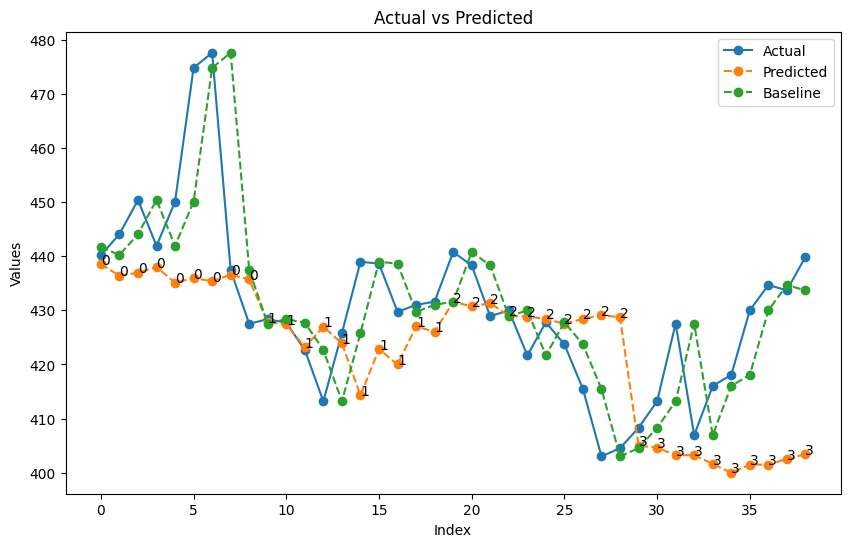

In [12]:
plot_actual_vs_predicted(predictions['y'][1:].reset_index(drop=True), predictions['NBEATS'][1:].reset_index(drop=True), predictions['y'].shift(1)[1:].reset_index(drop=True), predictions['modelID'][1:].reset_index(drop=True))

In [19]:
train_val_set = pd.concat([train_set, val_set],ignore_index=True)
loss, predictions = pipeline_train_predict(models, train_val_set, test_set, horizon, mean_squared_error, "NBEATS")

784 5
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 138.99it/s]
789 5
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 272.11it/s]
794 5
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 392.50it/s]
799 5
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 166.22it/s]
804 5
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]
809 5
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]
814 5
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 64.02it/s]
819 5
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 304.66it/s]
824 5
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 66.64it/s]
829 5
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 290.30it/s]
834 5
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 245.61it/s]
839 5
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 285.50it/s]


In [18]:
predictions

,unique_id,ds,NBEATS,index,y,modelID
0,NFLX,2023-02-24,443.698303,0,439.880005,0
1,NFLX,2023-02-25,439.346985,1,448.679993,0
2,NFLX,2023-02-26,442.825897,2,445.760010,0
3,NFLX,2023-02-27,448.869751,3,443.140015,0
4,NFLX,2023-02-28,445.565155,4,442.799988,0
5,NFLX,2023-03-01,445.176117,5,445.359985,0
6,NFLX,2023-03-02,443.456329,6,434.690002,0
7,NFLX,2023-03-03,444.735901,7,412.239990,0
8,NFLX,2023-03-04,443.926605,8,400.489990,0
9,NFLX,2023-03-05,446.959503,9,396.940002,0


In [16]:
model.predict()

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 202.80it/s]


,ds,NBEATS
unique_id,,
NFLX,2023-02-24,443.698303
NFLX,2023-02-25,439.346985
NFLX,2023-02-26,442.825897
NFLX,2023-02-27,448.869751
NFLX,2023-02-28,445.565155
NFLX,2023-03-01,445.176117
NFLX,2023-03-02,443.456329
NFLX,2023-03-03,444.735901
NFLX,2023-03-04,443.926605


In [13]:
predictions

,unique_id,ds,NBEATS,NBEATS-median,NBEATS-lo-90,NBEATS-hi-90,index,y
0,NFLX,2023-01-15,437.750000,437.0,404.000000,474.000000,0,441.709991
1,NFLX,2023-01-16,439.558990,439.0,405.000000,477.000000,1,440.209991
2,NFLX,2023-01-17,439.554993,439.0,405.000000,476.049988,2,444.049988
3,NFLX,2023-01-18,440.588989,440.0,407.950012,476.000000,3,450.380005
4,NFLX,2023-01-19,439.825012,439.0,405.000000,475.000000,4,441.910004
5,NFLX,2023-01-20,438.092987,437.5,405.950012,471.000000,5,450.049988
6,NFLX,2023-01-21,442.847992,444.0,409.000000,477.000000,6,474.799988
7,NFLX,2023-01-22,440.056000,440.0,405.000000,474.049988,7,477.589996
8,NFLX,2023-01-23,439.641998,439.0,406.950012,474.000000,8,437.420013
9,NFLX,2023-01-24,442.152008,443.0,406.000000,477.000000,9,427.500000


In [14]:
# models, train_set, val_set, mean_squared_error, "NBEATS"
model = NeuralForecast(models=models, freq='D')
model.fit(train_set)

p =  model.predict(futr_df=val_set).reset_index()
p = p.merge(val_set[['ds','unique_id', 'y']].reset_index(), on=['ds', 'unique_id'], how='left')
p

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 80.94it/s]


,unique_id,ds,FEDformer,index,y
0,NFLX,2023-01-15,438.678711,0,441.709991
1,NFLX,2023-01-16,438.838165,1,440.209991
2,NFLX,2023-01-17,438.809814,2,444.049988
3,NFLX,2023-01-18,438.636658,3,450.380005
4,NFLX,2023-01-19,438.202515,4,441.910004
5,NFLX,2023-01-20,437.978302,5,450.049988
6,NFLX,2023-01-21,438.617065,6,474.799988
7,NFLX,2023-01-22,438.683990,7,477.589996
8,NFLX,2023-01-23,438.599762,8,437.420013
9,NFLX,2023-01-24,438.931122,9,427.500000


In [287]:
FINAL_COLS

['log_return_1',
 'mean_future',
 'mean_influential',
 'mean_trustworthy',
 'mean_clickbait',
 'finbert_Score',
 'bart_Score',
 'vader_Score',
 'log_return_gspc_1',
 'norm_rsi_14',
 'norm_slowk_14',
 'norm_roc_14']